# Utility Analysis

Examine the utility results for all synthesis methods using the different user models.

In [12]:
import sys

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('..')
from helper_functions import *

Import the original data set.

In [3]:
train_data = pd.read_csv("../../Data/Criteo/cleaned_criteo.gz",
                         compression='gzip', 
                         sep='\,',
                         header=0,
                         engine='python')

Import synthetic data sets produced by the optimized method.

In [5]:
# path to where synthetic data sets are stored
synthetic_data_path = "../../Data/Criteo/"

optimized_sXs = [pd.read_csv(synthetic_data_path + "cart_" + str(i) + "_full.csv") for i in range(20)]

## Logistic Regression

Compare the estimates of logistic regression coefficients from the confidential data to those from the synthetic data sets.

In [9]:
# define y variable name
target_variable = 'conversion'
# define names of x variables
exog_variables = list(train_data.drop(target_variable, axis=1).columns)
# compute target parameters from logistic regression predicting y as a function of the x variables
target_params = logit_params(X = train_data[exog_variables], y = train_data[target_variable])

In [10]:
target_params

intercept   -0.175636
f0           0.012819
f1          -0.709895
f2          -1.012732
f3          -0.063390
f4           0.757181
f5          -0.166353
f6           0.028946
f7          -0.050328
f8          -0.646949
f9          -0.010780
f10          0.170575
f11         -0.592280
treatment   -0.599584
visit        7.431786
exposure     1.439664
dtype: float64

In [11]:
synthetic_params = [logit_params(X = sX[exog_variables], y = sX[target_variable]) for sX in optimized_sXs]

In [24]:
synthetic_param_df = pd.DataFrame(synthetic_params).T

In [25]:
synthetic_param_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
intercept,-0.055893,-0.054441,-0.057074,-0.052076,-0.057827,-0.053442,-0.054685,-0.054818,-0.055420,-0.053271,-0.054155,-0.056227,-0.055016,-0.053824,-0.055538,-0.056559,-0.053326,-0.059961,-0.051749,-0.057907
f0,-0.004918,-0.009082,-0.007588,-0.007800,-0.006377,-0.010856,-0.011744,-0.009051,-0.008734,-0.008349,-0.007282,-0.009917,-0.010336,-0.009346,-0.009879,-0.011348,-0.006060,-0.006477,-0.008649,-0.007727
f1,-0.502188,-0.476961,-0.505648,-0.462058,-0.528534,-0.487340,-0.509921,-0.495670,-0.522347,-0.503955,-0.501084,-0.488113,-0.507884,-0.497475,-0.500858,-0.502245,-0.496887,-0.557732,-0.474330,-0.509161
f2,-0.215951,-0.215106,-0.237776,-0.198813,-0.239232,-0.250962,-0.245878,-0.220335,-0.232176,-0.283376,-0.225116,-0.233108,-0.267922,-0.216723,-0.236039,-0.259654,-0.199062,-0.230359,-0.203554,-0.254174
f3,-0.014740,-0.003448,-0.017821,-0.003694,-0.013055,0.001724,0.009099,-0.007099,-0.001700,-0.005318,-0.016507,-0.000209,-0.002907,0.015083,-0.007048,0.001321,-0.000119,-0.022622,0.011196,-0.014848
f4,-0.136010,-0.150340,-0.146842,-0.150959,-0.084519,-0.122025,-0.099688,-0.150708,-0.122934,-0.129875,-0.123355,-0.141700,-0.098136,-0.128455,-0.150879,-0.106049,-0.143462,-0.118077,-0.110871,-0.114398
f5,-0.118876,-0.092500,-0.055332,-0.161687,-0.142874,-0.118879,-0.125184,-0.119537,-0.097155,-0.129809,-0.101101,-0.102091,-0.112368,-0.111507,-0.133057,-0.089183,-0.144033,-0.119420,-0.155237,-0.129418
f6,0.003478,-0.000859,0.003010,-0.003092,0.002928,-0.002385,-0.004153,-0.002263,0.000339,-0.001945,0.001041,-0.001121,-0.001059,-0.003004,-0.001840,-0.000324,0.001547,0.003855,-0.002502,0.002290
f7,-0.040160,-0.032391,-0.019736,-0.042554,-0.049248,-0.042273,-0.034738,-0.033907,-0.016827,-0.034749,-0.045326,-0.031830,-0.038754,-0.034497,-0.049152,-0.027413,-0.049419,-0.023713,-0.052088,-0.046403
f8,-0.260063,-0.251392,-0.266340,-0.237745,-0.265136,-0.239582,-0.249353,-0.247981,-0.245107,-0.236834,-0.251555,-0.256008,-0.244383,-0.246591,-0.256036,-0.260119,-0.254053,-0.269303,-0.235773,-0.264795


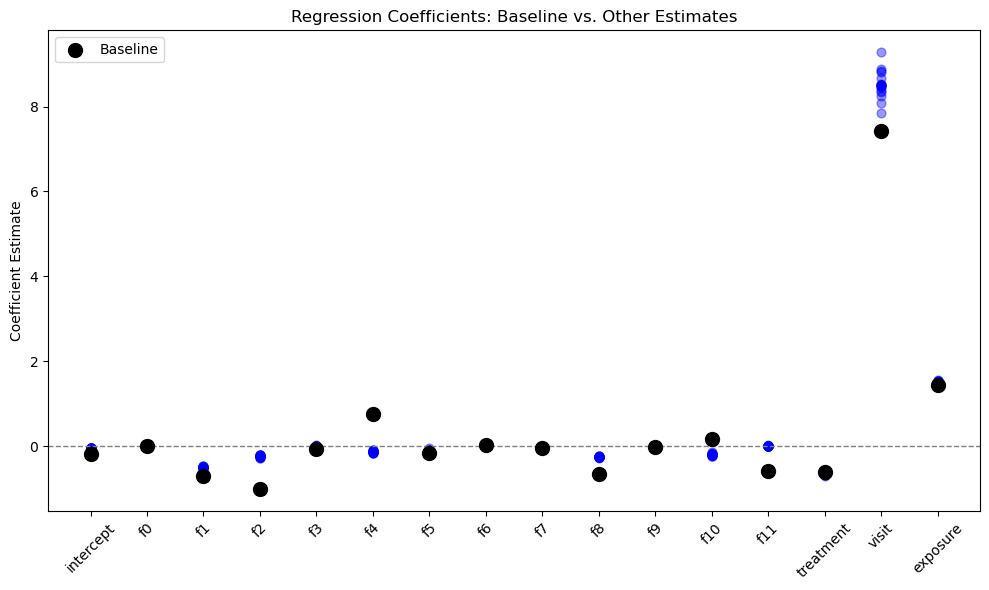

In [27]:
# Plot
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(target_params))

# Baseline (black dots)
ax.scatter(x, target_params.values, color="black", s=100, zorder=3, label="Baseline")

# Other estimates (blue dots, semi-transparent)
for col in synthetic_param_df.columns:
    ax.scatter(x, synthetic_param_df[col].values, color="blue", alpha=0.4, s=40)

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(target_params.index, rotation=45)
ax.axhline(0, color="gray", linewidth=1, linestyle="--")
ax.set_ylabel("Coefficient Estimate")
ax.legend()
ax.set_title("Regression Coefficients: Baseline vs. Other Estimates")

plt.tight_layout()
plt.show()